In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/ham10000-metadata/HAM10000_Extraction.csv')

In [3]:
# Display the dataframe
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,R,G,B,FR,FG,FB
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,216,171,202,209,163,163
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,225,190,222,198,157,157
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,220,157,176,215,157,157
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,24,12,16,196,143,143
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,248,231,241,212,168,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,221,193,192,204,170,170
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,219,189,189,184,154,154
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,243,215,214,220,190,190
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,197,174,182,190,155,155


In [4]:
df = df.drop(['lesion_id', 'image_id'], axis=1)

In [5]:
# Display the first 5 rows of the DataFrame
df.head()

,dx,dx_type,age,sex,localization,dataset,R,G,B,FR,FG,FB
0,bkl,histo,80.0,male,scalp,vidir_modern,216,171,202,209,163,163
1,bkl,histo,80.0,male,scalp,vidir_modern,225,190,222,198,157,157
2,bkl,histo,80.0,male,scalp,vidir_modern,220,157,176,215,157,157
3,bkl,histo,80.0,male,scalp,vidir_modern,24,12,16,196,143,143
4,bkl,histo,75.0,male,ear,vidir_modern,248,231,241,212,168,168


In [6]:
df.columns

Index(['dx', 'dx_type', 'age', 'sex', 'localization', 'dataset', 'R', 'G', 'B',
       'FR', 'FG', 'FB'],
      dtype='object')

In [7]:
# Display the last 5 rows of the DataFrame
df.tail()

,dx,dx_type,age,sex,localization,dataset,R,G,B,FR,FG,FB
10010,akiec,histo,40.0,male,abdomen,vidir_modern,221,193,192,204,170,170
10011,akiec,histo,40.0,male,abdomen,vidir_modern,219,189,189,184,154,154
10012,akiec,histo,40.0,male,abdomen,vidir_modern,243,215,214,220,190,190
10013,akiec,histo,80.0,male,face,vidir_modern,197,174,182,190,155,155
10014,mel,histo,70.0,female,back,vidir_modern,180,146,119,177,143,143


In [8]:
# Display a summary of the basic statistics for each column of the DataFrame
df.describe()

,age,R,G,B,FR,FG,FB
count,9958.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,51.863828,201.514129,153.907239,162.150674,195.199501,139.763455,139.763455
std,16.968614,45.872747,39.801097,43.050822,25.060728,21.867222,21.867222
min,0.000000,0.000000,0.000000,0.000000,64.000000,53.000000,53.000000
25%,40.000000,189.000000,142.000000,148.000000,177.000000,125.000000,125.000000
50%,50.000000,211.000000,159.000000,168.000000,197.000000,140.000000,140.000000
75%,65.000000,227.000000,175.000000,186.000000,214.000000,154.000000,154.000000
max,85.000000,255.000000,255.000000,255.000000,255.000000,225.000000,225.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dx            10015 non-null  object 
 1   dx_type       10015 non-null  object 
 2   age           9958 non-null   float64
 3   sex           10015 non-null  object 
 4   localization  10015 non-null  object 
 5   dataset       10015 non-null  object 
 6   R             10015 non-null  int64  
 7   G             10015 non-null  int64  
 8   B             10015 non-null  int64  
 9   FR            10015 non-null  int64  
 10  FG            10015 non-null  int64  
 11  FB            10015 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 939.0+ KB


In [10]:
df.shape

(10015, 12)

In [11]:
df.isnull().sum()

dx               0
dx_type          0
age             57
sex              0
localization     0
dataset          0
R                0
G                0
B                0
FR               0
FG               0
FB               0
dtype: int64

In [12]:
# Drop null values in the 'column_name' column
df.dropna(subset=['age'], inplace=True)

In [13]:
df.isnull().sum()

dx              0
dx_type         0
age             0
sex             0
localization    0
dataset         0
R               0
G               0
B               0
FR              0
FG              0
FB              0
dtype: int64

<Axes: xlabel='dx', ylabel='count'>

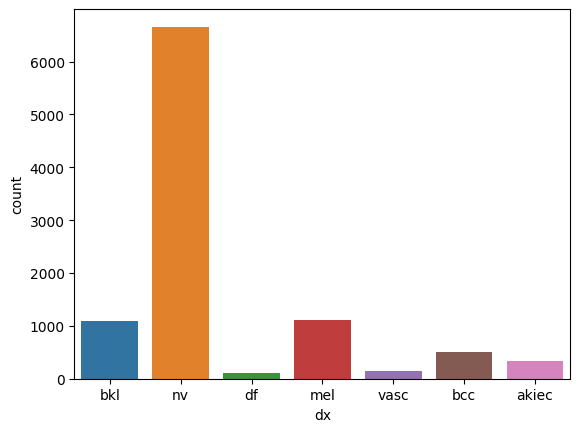

In [14]:
# Create a countplot to visualize the distribution of values in the 'Gender' column
sns.countplot(x ='dx', data = df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


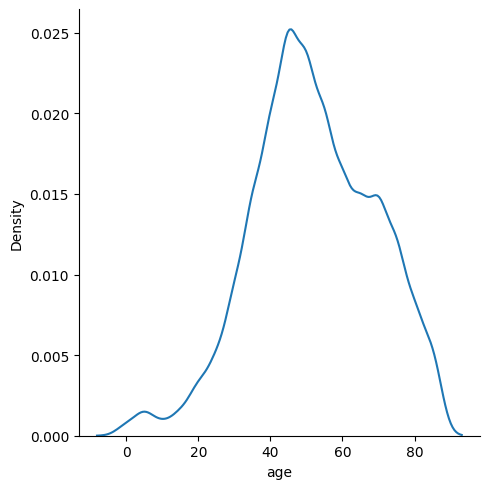

In [15]:
# Create a kernel density plot of the 'Age' column
sns.displot(df, x="age", kind="kde")

In [16]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the 'age' column
scaler = MinMaxScaler()
df[['age']] = scaler.fit_transform(df[['age']])

In [17]:
# Assuming your DataFrame is named 'df'
dx_counts = df['dx'].value_counts()

# Print the count for each value in the 'dx' column
print(dx_counts)

dx
nv       6660
mel      1111
bkl      1089
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [18]:
df['dx'].value_counts()

dx
nv       6660
mel      1111
bkl      1089
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [19]:
# Replace the 'Female' and 'Male' values in the 'Gender' column with 0 and 1, respectively
df['dx'] = df['dx'].replace(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], [0, 1, 2, 3, 4, 5, 6])

/tmp/ipykernel_64/3271122499.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dx'] = df['dx'].replace(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], [0, 1, 2, 3, 4, 5, 6])


<Axes: xlabel='dx_type', ylabel='count'>

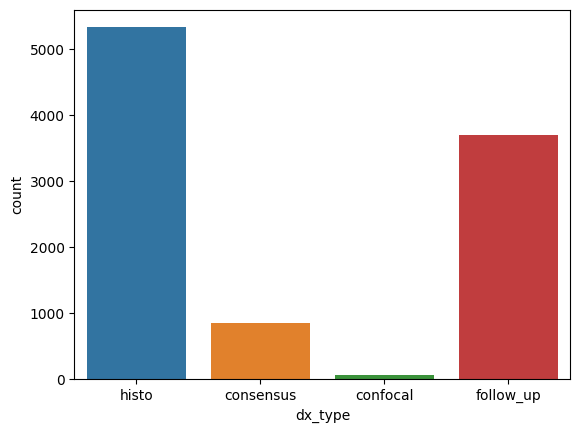

In [20]:
# Create a countplot to visualize the distribution of values in the 'Gender' column
sns.countplot(x ='dx_type', data = df)

In [21]:
# Replace the 'Female' and 'Male' values in the 'Gender' column with 0 and 1, respectively
df['dx_type'] = df['dx_type'].replace(['histo', 'consensus', 'confocal', 'follow_up'], [0, 1, 2, 3])

/tmp/ipykernel_64/1529179340.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dx_type'] = df['dx_type'].replace(['histo', 'consensus', 'confocal', 'follow_up'], [0, 1, 2, 3])


<Axes: xlabel='sex', ylabel='count'>

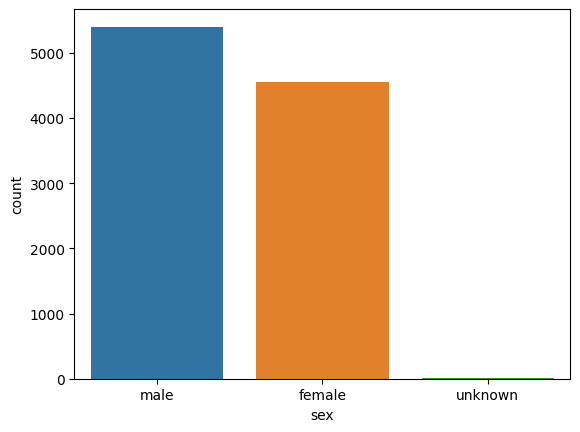

In [22]:
# Create a countplot to visualize the distribution of values in the 'Gender' column
sns.countplot(x ='sex', data = df)

In [23]:
# Replace the 'Female' and 'Male' values in the 'Gender' column with 0 and 1, respectively
df['sex'] = df['sex'].replace(['male', 'female', 'unknown'], [0, 1, 2])

/tmp/ipykernel_64/3025121863.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace(['male', 'female', 'unknown'], [0, 1, 2])


<Axes: xlabel='localization', ylabel='count'>

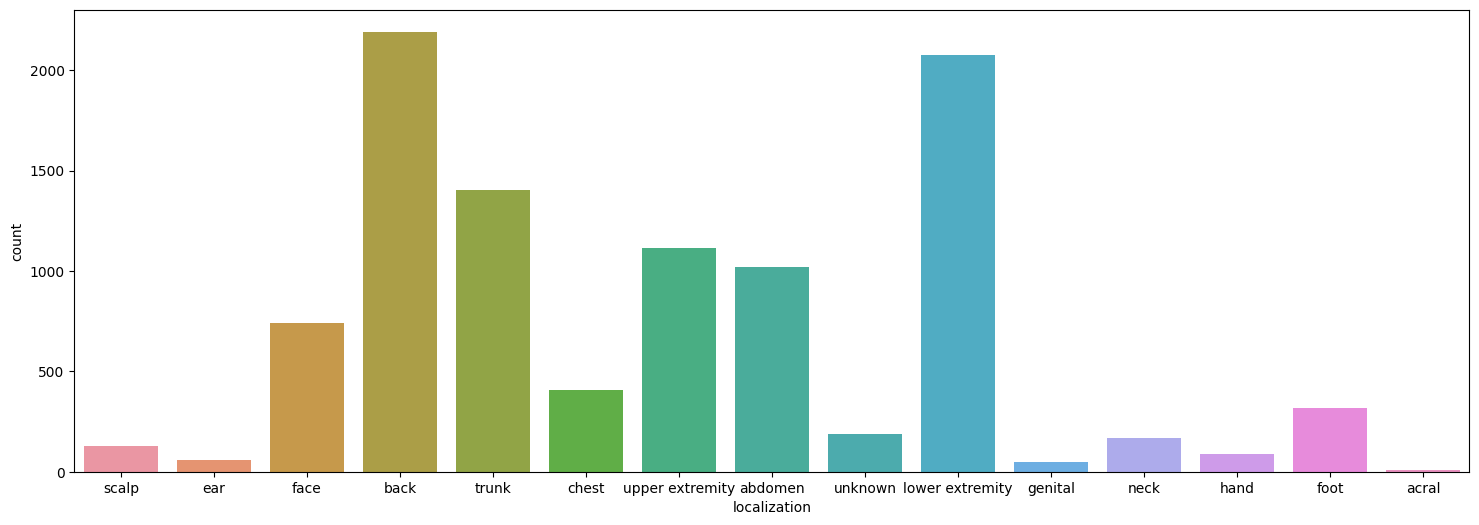

In [24]:
# Create a countplot to visualize the distribution of values in the 'Gender' column
plt.figure(figsize=(18, 6))
sns.countplot(x ='localization', data = df)

In [25]:
df['localization'] = pd.factorize(df['localization'])[0]

In [26]:
# Display a summary of the basic statistics for each column of the DataFrame
df.describe()

,dx,dx_type,age,sex,localization,R,G,B,FR,FG,FB
count,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000
mean,4.180860,1.215405,0.610163,0.458727,5.765616,201.557240,153.833199,162.025105,195.275055,139.712593,139.712593
std,1.460238,1.408555,0.199631,0.500330,2.968567,45.974264,39.875839,43.116866,25.069452,21.873341,21.873341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,53.000000,53.000000
25%,4.000000,0.000000,0.470588,0.000000,3.000000,189.000000,142.000000,148.000000,177.000000,125.000000,125.000000
50%,5.000000,0.000000,0.588235,0.000000,6.000000,211.000000,159.000000,168.000000,198.000000,140.000000,140.000000
75%,5.000000,3.000000,0.764706,1.000000,9.000000,227.000000,175.000000,186.000000,214.000000,154.000000,154.000000
max,6.000000,3.000000,1.000000,2.000000,14.000000,255.000000,255.000000,255.000000,255.000000,225.000000,225.000000


In [27]:
df

,dx,dx_type,age,sex,localization,dataset,R,G,B,FR,FG,FB
0,2,0,0.941176,0,0,vidir_modern,216,171,202,209,163,163
1,2,0,0.941176,0,0,vidir_modern,225,190,222,198,157,157
2,2,0,0.941176,0,0,vidir_modern,220,157,176,215,157,157
3,2,0,0.941176,0,0,vidir_modern,24,12,16,196,143,143
4,2,0,0.882353,0,1,vidir_modern,248,231,241,212,168,168
...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0,0,0.470588,0,7,vidir_modern,221,193,192,204,170,170
10011,0,0,0.470588,0,7,vidir_modern,219,189,189,184,154,154
10012,0,0,0.470588,0,7,vidir_modern,243,215,214,220,190,190
10013,0,0,0.941176,0,2,vidir_modern,197,174,182,190,155,155


<Axes: xlabel='dataset', ylabel='count'>

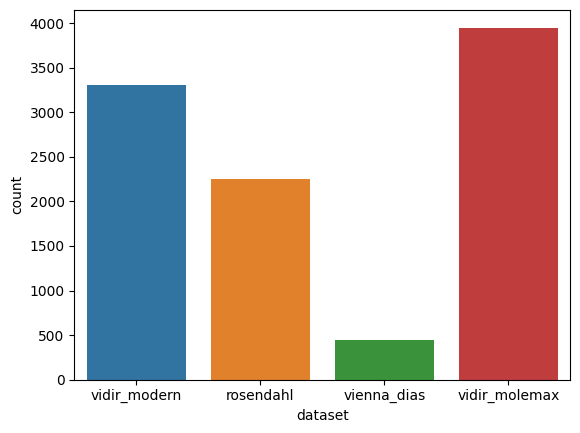

In [28]:
# Create a countplot to visualize the distribution of values in the 'Gender' column
sns.countplot(x ='dataset', data = df)

In [29]:
df['dataset'] = df['dataset'].replace(['vidir_modern', 'rosendahl', 'vienna_dias', 'vidir_molemax'], [0, 1, 2, 3])

/tmp/ipykernel_64/1185643787.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dataset'] = df['dataset'].replace(['vidir_modern', 'rosendahl', 'vienna_dias', 'vidir_molemax'], [0, 1, 2, 3])


In [30]:
df

,dx,dx_type,age,sex,localization,dataset,R,G,B,FR,FG,FB
0,2,0,0.941176,0,0,0,216,171,202,209,163,163
1,2,0,0.941176,0,0,0,225,190,222,198,157,157
2,2,0,0.941176,0,0,0,220,157,176,215,157,157
3,2,0,0.941176,0,0,0,24,12,16,196,143,143
4,2,0,0.882353,0,1,0,248,231,241,212,168,168
...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0,0,0.470588,0,7,0,221,193,192,204,170,170
10011,0,0,0.470588,0,7,0,219,189,189,184,154,154
10012,0,0,0.470588,0,7,0,243,215,214,220,190,190
10013,0,0,0.941176,0,2,0,197,174,182,190,155,155


In [31]:
df[['R']] = scaler.fit_transform(df[['R']])
df[['G']] = scaler.fit_transform(df[['G']])
df[['B']] = scaler.fit_transform(df[['B']])

In [32]:
df[['FR']] = scaler.fit_transform(df[['FR']])
df[['FG']] = scaler.fit_transform(df[['FG']])
df[['FB']] = scaler.fit_transform(df[['FB']])

In [33]:
df

,dx,dx_type,age,sex,localization,dataset,R,G,B,FR,FG,FB
0,2,0,0.941176,0,0,0,0.847059,0.670588,0.792157,0.759162,0.639535,0.639535
1,2,0,0.941176,0,0,0,0.882353,0.745098,0.870588,0.701571,0.604651,0.604651
2,2,0,0.941176,0,0,0,0.862745,0.615686,0.690196,0.790576,0.604651,0.604651
3,2,0,0.941176,0,0,0,0.094118,0.047059,0.062745,0.691099,0.523256,0.523256
4,2,0,0.882353,0,1,0,0.972549,0.905882,0.945098,0.774869,0.668605,0.668605
...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0,0,0.470588,0,7,0,0.866667,0.756863,0.752941,0.732984,0.680233,0.680233
10011,0,0,0.470588,0,7,0,0.858824,0.741176,0.741176,0.628272,0.587209,0.587209
10012,0,0,0.470588,0,7,0,0.952941,0.843137,0.839216,0.816754,0.796512,0.796512
10013,0,0,0.941176,0,2,0,0.772549,0.682353,0.713725,0.659686,0.593023,0.593023


In [34]:
import pandas as pd
from sklearn.utils import resample

# Identify the unique classes in the 'dx' column
unique_classes = df['dx'].unique()

# Initialize variables for majority and minority classes
majority_class = None
minority_class = None

# Find the majority and minority classes
for class_label in unique_classes:
    class_count = df['dx'].value_counts()[class_label]
    if majority_class is None or class_count > df['dx'].value_counts()[majority_class]:
        majority_class = class_label
    if minority_class is None or class_count < df['dx'].value_counts()[minority_class]:
        minority_class = class_label

# Separate the majority and minority classes
df_majority = df[df['dx'] == majority_class]
df_minority = pd.concat([df[df['dx'] == c] for c in unique_classes if c != majority_class])

# Upsample the minority classes to match the majority class
df_minority_upsampled = pd.concat([resample(df_minority[df_minority['dx'] == c],
                                            replace=True,
                                            n_samples=len(df_majority),
                                            random_state=42) for c in unique_classes if c != majority_class])

# Combine the majority class with the upsampled minority classes
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataframe to mix the classes
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [35]:
# Print the number of values in each class after upsampling
class_counts_upsampled = df_upsampled['dx'].value_counts()

# Print the result
print("Class counts after upsampling:")
print(class_counts_upsampled)

Class counts after upsampling:
dx
4    6660
6    6660
3    6660
1    6660
5    6660
2    6660
0    6660
Name: count, dtype: int64


In [36]:
# Assuming 'df' is your DataFrame
X = df_upsampled.drop('dx', axis=1)
y = df_upsampled['dx']

****K-Nearest Neighbors****

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [38]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [40]:
# Train the KNN model
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
# Make predictions on the test set
y_pred_KNeighbors = knn_classifier.predict(X_test)

In [42]:
# Evaluate the KNN model
accuracy = accuracy_score(y_test, y_pred_KNeighbors)
classification_rep = classification_report(y_test, y_pred_KNeighbors)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1279
           1       0.95      1.00      0.97      1357
           2       0.92      0.96      0.94      1354
           3       0.99      1.00      0.99      1333
           4       0.87      0.95      0.91      1312
           5       0.98      0.75      0.85      1358
           6       0.99      1.00      1.00      1331

    accuracy                           0.95      9324
   macro avg       0.95      0.95      0.95      9324
weighted avg       0.95      0.95      0.95      9324



In [43]:
# Calculate and print the test accuracy
test_accuracy_KNeighbors = accuracy_score(y_test, y_pred_KNeighbors)
print(f"Test Accuracy: {test_accuracy_KNeighbors:.2%}")

Test Accuracy: 95.03%


In [44]:
y_pred_KNeighbors 

array([6, 3, 0, ..., 4, 1, 1])

In [45]:
# Assuming y_pred_KNeighbors is your NumPy array
unique_values, counts = np.unique(y_pred_KNeighbors, return_counts=True)

# Create a dictionary to display the counts
counts_dict = dict(zip(unique_values, counts))

# Print the counts
print("Counts of unique values in y_pred_KNeighbors:")
print(counts_dict)

Counts of unique values in y_pred_KNeighbors:
{0: 1321, 1: 1433, 2: 1409, 3: 1347, 4: 1431, 5: 1039, 6: 1344}


In [46]:
import joblib
# Save the Decision Tree model using joblib
joblib.dump(knn_classifier, '/kaggle/working/KNeighbors_Model.joblib')

['/kaggle/working/KNeighbors_Model.joblib']

****AdaBoost Model****

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [48]:
# Instantiate the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

In [49]:
# Train the AdaBoost model
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [50]:
# Make predictions on the test set
y_pred_adaboost = adaboost_classifier.predict(X_test)

In [51]:
# Evaluate the AdaBoost model
accuracy = accuracy_score(y_test, y_pred_adaboost)
classification_rep = classification_report(y_test, y_pred_adaboost)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.46
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.65      0.53      1279
           1       0.45      0.40      0.42      1357
           2       0.43      0.29      0.35      1354
           3       0.42      0.38      0.40      1333
           4       0.42      0.34      0.38      1312
           5       0.64      0.69      0.66      1358
           6       0.38      0.48      0.42      1331

    accuracy                           0.46      9324
   macro avg       0.46      0.46      0.45      9324
weighted avg       0.46      0.46      0.45      9324



In [52]:
# Calculate and print the test accuracy
test_accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Test Accuracy: {test_accuracy_adaboost:.2%}")

Test Accuracy: 45.98%


****Support Vector Machine****

In [53]:
from sklearn.svm import SVC

In [54]:
# Instantiate the Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [55]:
# Train the SVM model
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [56]:
# Make predictions on the test set
y_pred_SVM = svm_classifier.predict(X_test)

In [57]:
classification_rep_SVM = classification_report(y_test, y_pred_SVM)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.65      0.53      1279
           1       0.45      0.40      0.42      1357
           2       0.43      0.29      0.35      1354
           3       0.42      0.38      0.40      1333
           4       0.42      0.34      0.38      1312
           5       0.64      0.69      0.66      1358
           6       0.38      0.48      0.42      1331

    accuracy                           0.46      9324
   macro avg       0.46      0.46      0.45      9324
weighted avg       0.46      0.46      0.45      9324



In [58]:
# Calculate and print the test accuracy
test_accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print(f"Test Accuracy: {test_accuracy_SVM:.2%}")

Test Accuracy: 50.16%


****Decision Tree****

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
# Instantiate the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

In [61]:
# Train the Decision Tree model
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
# Make predictions on the test set
y_pred_DecisionTree = decision_tree_classifier.predict(X_test)

In [63]:
# Calculate and print the test accuracy
test_accuracy_DecisionTree = accuracy_score(y_test, y_pred_DecisionTree)
print(f"Test Accuracy: {test_accuracy_DecisionTree:.2%}")

Test Accuracy: 97.39%


In [64]:
# Optionally, print the classification report for more details
classification_rep_DecisionTree = classification_report(y_test, y_pred_DecisionTree)
print("Classification Report:\n", classification_rep_DecisionTree)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1279
           1       0.98      1.00      0.99      1357
           2       0.95      1.00      0.97      1354
           3       0.99      1.00      1.00      1333
           4       0.93      0.99      0.96      1312
           5       1.00      0.83      0.91      1358
           6       0.99      1.00      0.99      1331

    accuracy                           0.97      9324
   macro avg       0.97      0.97      0.97      9324
weighted avg       0.98      0.97      0.97      9324



In [65]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [66]:
import joblib

# Instantiate the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
decision_tree_classifier.fit(X_train, y_train)

# Save the Decision Tree model using joblib
joblib.dump(decision_tree_classifier, '/kaggle/working/decisionTree_model.joblib')

['/kaggle/working/decisionTree_model.joblib']

In [67]:
predictions = decision_tree_classifier.predict(X_test)

# Store the prediction values in an array
prediction_array = predictions.tolist()

# Print or use the prediction array as needed
print(prediction_array)

[6, 3, 0, 6, 2, 2, 4, 4, 4, 1, 2, 1, 6, 4, 6, 3, 4, 0, 5, 1, 2, 6, 6, 1, 3, 2, 6, 4, 0, 1, 1, 4, 3, 0, 3, 0, 0, 2, 2, 4, 5, 4, 6, 3, 0, 4, 5, 0, 5, 6, 0, 0, 2, 3, 4, 6, 0, 2, 6, 6, 6, 0, 3, 5, 6, 0, 6, 4, 1, 3, 1, 2, 4, 1, 1, 3, 2, 4, 2, 6, 2, 1, 4, 1, 3, 6, 6, 0, 6, 2, 2, 4, 1, 5, 3, 1, 0, 6, 1, 0, 0, 4, 4, 2, 4, 1, 0, 5, 4, 4, 5, 0, 2, 1, 3, 3, 4, 1, 0, 0, 4, 4, 1, 4, 3, 4, 1, 0, 1, 5, 4, 3, 3, 4, 4, 3, 3, 5, 4, 4, 5, 1, 5, 1, 4, 3, 1, 3, 4, 2, 3, 2, 3, 0, 2, 3, 1, 3, 6, 0, 5, 3, 2, 1, 1, 0, 2, 1, 3, 3, 5, 5, 4, 4, 4, 3, 2, 6, 0, 6, 0, 1, 5, 1, 5, 2, 3, 2, 0, 5, 0, 2, 0, 1, 4, 0, 2, 2, 2, 2, 1, 3, 0, 1, 3, 3, 1, 3, 2, 4, 3, 3, 3, 3, 5, 0, 6, 6, 0, 2, 2, 3, 6, 3, 4, 2, 0, 6, 3, 6, 1, 6, 2, 6, 5, 4, 4, 1, 4, 0, 6, 3, 4, 1, 5, 2, 4, 1, 1, 6, 2, 0, 3, 6, 2, 3, 2, 6, 6, 5, 2, 3, 1, 2, 6, 1, 3, 4, 6, 4, 2, 1, 5, 5, 3, 2, 0, 5, 6, 0, 2, 4, 6, 2, 5, 0, 2, 2, 2, 5, 2, 1, 6, 3, 5, 1, 0, 0, 0, 4, 0, 5, 5, 3, 6, 3, 6, 5, 6, 4, 3, 6, 5, 1, 4, 3, 6, 4, 1, 5, 0, 3, 6, 3, 3, 6, 4, 3, 5, 5, 0, 6, 6, 

****Logistic Regression****

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
# Instantiate the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(random_state=42)

In [70]:
# Train the Logistic Regression model
logistic_regression_classifier.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [71]:
# Make predictions on the test set
y_pred_logistic_regression = logistic_regression_classifier.predict(X_test)

In [72]:
# Calculate and print the test accuracy
test_accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print(f"Test Accuracy (Logistic Regression): {test_accuracy_logistic_regression:.2%}")

Test Accuracy (Logistic Regression): 45.83%


In [73]:
classification_rep_logistic_regression = classification_report(y_test, y_pred_logistic_regression)
print("Classification Report (Logistic Regression):\n", classification_rep_logistic_regression)

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.40      0.48      0.44      1279
           1       0.41      0.47      0.44      1357
           2       0.56      0.31      0.40      1354
           3       0.44      0.57      0.50      1333
           4       0.39      0.53      0.45      1312
           5       0.69      0.56      0.62      1358
           6       0.45      0.29      0.35      1331

    accuracy                           0.46      9324
   macro avg       0.48      0.46      0.46      9324
weighted avg       0.48      0.46      0.46      9324

